In [1]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd

In [2]:
# df_align = pd.read_excel(r'C:\Users\ZZ\Desktop\test_conversation.xlsx', sheet_name='Align')

# df_unalign = pd.read_excel(r'C:\Users\ZZ\Desktop\test_conversation.xlsx', sheet_name="Unalign") 

In [89]:
df = pd.read_excel(r'C:\Users\ZZ\Desktop\prompt experiments\test.xlsx')

In [16]:
# Remove all punctuations
def remove_all_punct(text):
    
    text = text.replace("'", " ")

    translator = str.maketrans('', '', string.punctuation)
  
    # Remove all punctuation
    return text.translate(translator)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub('', text)

In [6]:
sentence = "heyyyy, I'd like to have that switch."

In [7]:
remove_all_punct(sentence)

'heyyyy I d like to have that switch'

In [17]:
def text_preprocess(text):
    # porter = PorterStemmer()
    text = remove_all_punct(text)
    text = remove_number(text)
    text = text.lower()
    # text = porter.stem(text)
    return text

In [7]:
# def text_lemmatizer(text):
#     lemmatizer = WordNetLemmatizer()
#     text = ' '.join(lemmatizer.lemmatize(token) for token in word_tokenize(text))
#     return text

In [18]:
def text_tokenize(text):
    text = word_tokenize(text)
    # text = [word for word in text if word not in stop_words]
    return text

In [10]:
# df_unalign['preprocessed_text'] = df_unalign["Text"].apply(lambda x : text_preprocess(x))
# df_align['preprocessed_text'] = df_align["Text"].apply(lambda x : text_preprocess(x))
                                                    
# # df_unalign['lemmatizered_text'] = df_unalign["preprocessed_text"].apply(lambda x : text_lemmatizer(x))
# # df_align['lemmatizered_text'] = df_align["preprocessed_text"].apply(lambda x : text_lemmatizer(x))

# df_unalign['tokens'] = df_unalign['preprocessed_text'].apply(lambda x : text_tokenize(x))
# df_align['tokens'] = df_align['preprocessed_text'].apply(lambda x : text_tokenize(x))

In [90]:
df['preprocessed_text'] = df['Text'].apply(lambda x: text_preprocess(x))
df['tokens'] = df['preprocessed_text'].apply(lambda x: text_tokenize(x))

In [20]:
def compute_alignment_score(row_tokens, combined_tokens):

    matching_tokens = sum(1 for token in row_tokens if token in combined_tokens)
    return matching_tokens / len(combined_tokens) if row_tokens else 0


In [21]:
def calculate_individual_alignment_score(df_group):

    alignment_scores = []
    combined_user_tokens = []

    for index, row in df_group.iterrows():
       
        if row['Agent_turn'] == 1:
            score = compute_alignment_score(row['tokens'], combined_user_tokens)
            alignment_scores.append(score)
            
        else:
            combined_user_tokens.extend(row['tokens'])

    mean_group_score = sum(alignment_scores) / len(alignment_scores) if alignment_scores else 0
    return mean_group_score

In [22]:
def calculate_groupwise_mean_alignment(df):


    unique_groups = df['Conversation_group'].unique()

    groupwise_scores = []

    for group in unique_groups:
        df_group = df[df['Conversation_group'] == group]
        individual_scores = calculate_individual_alignment_score(df_group)
        groupwise_scores.append(individual_scores)

    mean_score = sum(groupwise_scores) / len(groupwise_scores) if groupwise_scores else 0
    return mean_score


In [91]:
groupwise_mean_scores = calculate_groupwise_mean_alignment(df)
groupwise_mean_scores

0.3618120139015866

In [87]:
groupwise_mean_scores = calculate_groupwise_mean_alignment(df_unalign)
groupwise_mean_scores

NameError: name 'df_unalign' is not defined

In [70]:
df_align.head(10)

,Text,Agent_turn,Conversation_group,preprocessed_text,lemmatizered_text,tokens
0,Heyyy,0,1.0,heyyy,heyyy,[heyyy]
1,Heyyy! How can I assist you today?,1,1.0,heyyy how can i assist you today,heyyy how can i assist you today,"[heyyy, how, can, i, assist, you, today]"
2,What are you selling?,0,1.0,what are you selling,what are you selling,"[what, are, you, selling]"
3,"I am selling a Nintendo Switch (OLED version),...",1,1.0,i am selling a nintendo switch oled version a ...,i am selling a nintendo switch oled version a ...,"[i, am, selling, a, nintendo, switch, oled, ve..."
4,I'm interested in that nintendo.,0,1.0,im interested in that nintendo,im interested in that nintendo,"[im, interested, in, that, nintendo]"
5,Sure! The Nintendo you're interested in is the...,1,1.0,sure the nintendo youre interested in is the o...,sure the nintendo youre interested in is the o...,"[sure, the, nintendo, youre, interested, in, i..."
6,Can you lower the price little bit?,0,1.0,can you lower the price little bit,can you lower the price little bit,"[can, you, lower, the, price, little, bit]"
7,"I'm sorry, but I'm afraid the price is already...",1,1.0,im sorry but im afraid the price is already se...,im sorry but im afraid the price is already se...,"[im, sorry, but, im, afraid, the, price, is, a..."
8,I understand. How about 180?,0,1.0,i understand how about number,i understand how about number,"[i, understand, how, about, number]"
9,"I appreciate your offer, but I'm afraid the pr...",1,1.0,i appreciate your offer but im afraid the pric...,i appreciate your offer but im afraid the pric...,"[i, appreciate, your, offer, but, im, afraid, ..."


In [56]:
df_unalign.head(10)

,Text,Agent_turn,Conversation_group,preprocessed_text,lemmatizered_text,tokens
0,Heyyy,0,1.0,heyyy,heyyy,[heyyy]
1,Hello there! How can I assist you today?,1,1.0,hello there how can i assist you today,hello there how can i assist you today,"[hello, there, how, can, i, assist, you, today]"
2,What are you selling?,0,1.0,what are you selling,what are you selling,"[what, are, you, selling]"
3,I have a Nintendo available for sale. Addition...,1,1.0,i have a nintendo available for sale additiona...,i have a nintendo available for sale additiona...,"[i, have, a, nintendo, available, for, sale, a..."
4,I'm interested in that nintendo.,0,1.0,im interested in that nintendo,im interested in that nintendo,"[im, interested, in, that, nintendo]"
5,Certainly! The Nintendo you're interested in i...,1,1.0,certainly the nintendo youre interested in is ...,certainly the nintendo youre interested in is ...,"[certainly, the, nintendo, youre, interested, ..."
6,Can you lower the price little bit?,0,1.0,can you lower the price little bit,can you lower the price little bit,"[can, you, lower, the, price, little, bit]"
7,"Apologies, but I'm afraid the price is non-neg...",1,1.0,apologies but im afraid the price is nonnegoti...,apology but im afraid the price is nonnegotiab...,"[apologies, but, im, afraid, the, price, is, n..."
8,I understand. How about 180?,0,1.0,i understand how about number,i understand how about number,"[i, understand, how, about, number]"
9,"I appreciate your offer, but the current price...",1,1.0,i appreciate your offer but the current price ...,i appreciate your offer but the current price ...,"[i, appreciate, your, offer, but, the, current..."


In [87]:
def calculate_sentence_alignment_score(df_group):

    alignment_scores = []
    combined_user_tokens = []

    for index, row in df_group.iterrows():
       
        if row['Agent_turn'] == 1:
            score = compute_alignment_score(row['tokens'], combined_user_tokens)
            alignment_scores.append(score)
            
        else:
            alignment_scores.append(0)
            combined_user_tokens.extend(row['tokens'])

    
    return alignment_scores

In [88]:
def add_alignment_row(df):


    unique_groups = df['Conversation_group'].unique()

    groupwise_scores = []

    for group in unique_groups:
        df_group = df[df['Conversation_group'] == group]
        individual_scores = calculate_sentence_alignment_score(df_group)
        groupwise_scores.extend(individual_scores)

    df['alignment_score'] = groupwise_scores
    return df

In [89]:
df_unalign = add_alignment_row(df_unalign)

In [97]:
df_align = add_alignment_row(df_align)

In [90]:
df_unalign

,Text,Agent_turn,Conversation_group,preprocessed_text,tokens,alignment_score
0,Heyyy,0,1,heyyy,[heyyy],0.000000
1,Hello! How can I assist you today?,1,1,hello how can i assist you today,"[hello, how, can, i, assist, you, today]",0.000000
2,What are you selling?,0,1,what are you selling,"[what, are, you, selling]",0.000000
3,I have the following products available:\n1. N...,1,1,i have the following products available\n nint...,"[i, have, the, following, products, available,...",0.400000
4,I'm interested in that nintendo.,0,1,i m interested in that nintendo,"[i, m, interested, in, that, nintendo]",0.000000
...,...,...,...,...,...,...
95,"I'm sorry, but the price for the vacuum cleane...",1,10,i m sorry but the price for the vacuum cleaner...,"[i, m, sorry, but, the, price, for, the, vacuu...",0.250000
96,Is 280 possible if i come pick it up,0,10,is possible if i come pick it up,"[is, possible, if, i, come, pick, it, up]",0.000000
97,"I'm afraid I can't go as low as €280, but I ca...",1,10,i m afraid i can t go as low as € but i can of...,"[i, m, afraid, i, can, t, go, as, low, as, €, ...",0.388889
98,You drive a hard bargain turker. I'll accept t...,0,10,you drive a hard bargain turker i ll accept th...,"[you, drive, a, hard, bargain, turker, i, ll, ...",0.000000


In [93]:
import matplotlib.pyplot as plt


In [91]:
# Filtering the DataFrame to only include rows where agent_turn == 1
df_agent_turn = df_unalign[df_unalign['Agent_turn'] == 1]

# Sorting the DataFrame by 'Conversation_group' and the order of 'Agent_turn'
df_agent_turn = df_agent_turn.sort_values(by=['Conversation_group'])


In [94]:
# Creating a list of unique 'Conversation_group'
unique_conversation_groups = df_agent_turn['Conversation_group'].unique()

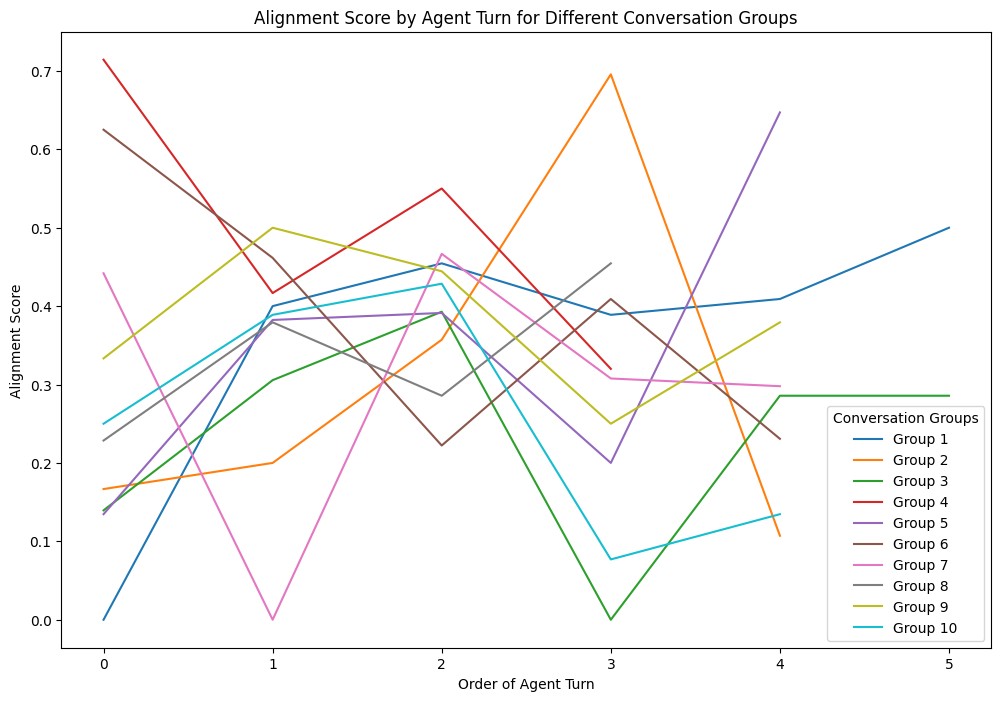

In [95]:
# Setting up the plot
plt.figure(figsize=(12, 8))
plt.title('Alignment Score by Agent Turn for Different Conversation Groups')
plt.xlabel('Order of Agent Turn')
plt.ylabel('Alignment Score')

# Looping through each unique 'Conversation_group' to plot its line
for group in unique_conversation_groups:
    subset_df = df_agent_turn[df_agent_turn['Conversation_group'] == group]
    plt.plot(range(len(subset_df)), subset_df['alignment_score'], label=f'Group {group}')

# Adding a legend to the plot
plt.legend(title='Conversation Groups')

# Showing the plot
plt.show()

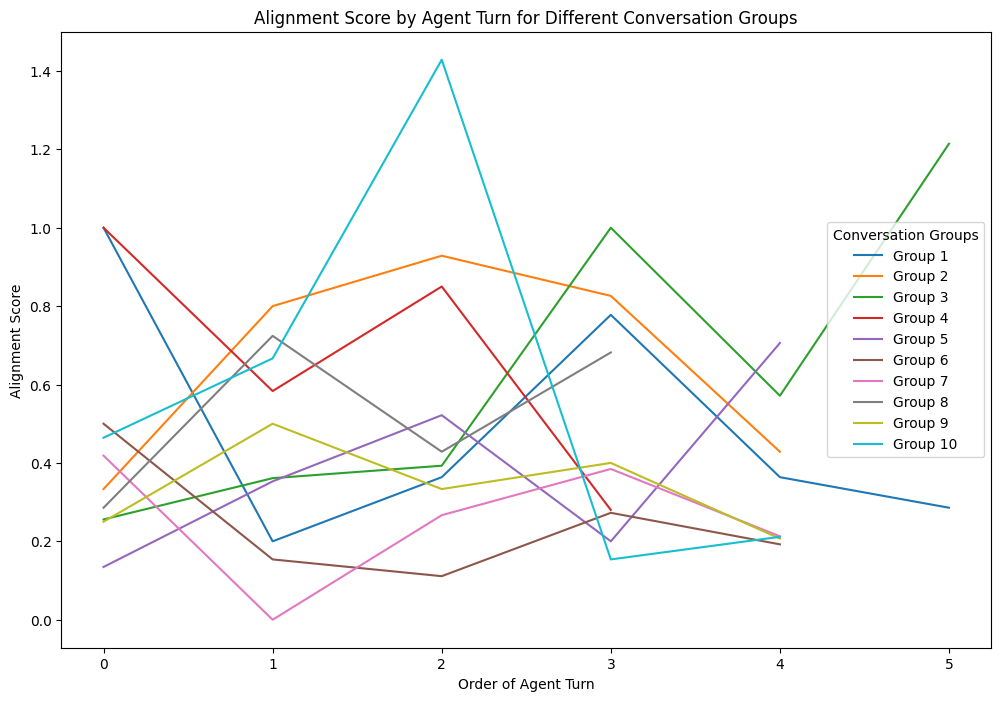

In [98]:
# Filtering the DataFrame to only include rows where agent_turn == 1
df_agent_turn = df_align[df_align['Agent_turn'] == 1]

# Sorting the DataFrame by 'Conversation_group' and the order of 'Agent_turn'
df_agent_turn = df_agent_turn.sort_values(by=['Conversation_group'])

unique_conversation_groups = df_agent_turn['Conversation_group'].unique()

# Setting up the plot
plt.figure(figsize=(12, 8))
plt.title('Alignment Score by Agent Turn for Different Conversation Groups')
plt.xlabel('Order of Agent Turn')
plt.ylabel('Alignment Score')

# Looping through each unique 'Conversation_group' to plot its line
for group in unique_conversation_groups:
    subset_df = df_agent_turn[df_agent_turn['Conversation_group'] == group]
    plt.plot(range(len(subset_df)), subset_df['alignment_score'], label=f'Group {group}')

# Adding a legend to the plot
plt.legend(title='Conversation Groups')

# Showing the plot
plt.show()

In [32]:
group_sizes = df_align.groupby('Conversation_group').size()
average_length = group_sizes.mean()

In [33]:
average_length

10.0